In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
print(os.getcwd())
aisles_df = pd.read_csv(r'DATA\aisles.csv')
dept_df = pd.read_csv(r'DATA\departments.csv')
order_prior = pd.read_csv(r'DATA\order_products__prior.csv')
order_train = pd.read_csv(r'DATA\order_products__train.csv')
order_df = pd.read_csv(r'DATA\orders.csv')
prod_df = pd.read_csv(r'DATA\products.csv')

d:\AAIC\Project 5


##### Understanding the 'AISLES' dataset:

In [4]:
print('HEAD: \n', aisles_df.head(20))
print('SHAPE: \n', aisles_df.shape)

HEAD: 
     aisle_id                         aisle
0          1         prepared soups salads
1          2             specialty cheeses
2          3           energy granola bars
3          4                 instant foods
4          5    marinades meat preparation
5          6                         other
6          7                 packaged meat
7          8               bakery desserts
8          9                   pasta sauce
9         10              kitchen supplies
10        11              cold flu allergy
11        12                   fresh pasta
12        13                prepared meals
13        14        tofu meat alternatives
14        15              packaged seafood
15        16                   fresh herbs
16        17            baking ingredients
17        18  bulk dried fruits vegetables
18        19                 oils vinegars
19        20                  oral hygiene
SHAPE: 
 (134, 2)


##### Understanding the 'DEPARTMENT' dataset:

In [5]:
print('HEAD: \n', dept_df.head(21))
print('SHAPE: ', dept_df.shape)

HEAD: 
     department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
SHAPE:  (21, 2)


##### Understanding the 'PRODUCTS' dataset:

In [6]:
print('SHAPE: ', prod_df.shape)
print('HEAD: \n')
prod_df.head()

SHAPE:  (49688, 4)
HEAD: 



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


##### Lets combine Products, Department and Aisles dataset:

In [7]:
dpa_df = prod_df.merge(dept_df,how="inner", on="department_id")
dpa_df = dpa_df.merge(aisles_df,how="inner", on="aisle_id")
dpa_df.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [8]:
print('How many unique aisles: ', dpa_df['aisle_id'].nunique())
print('How many unique departments: ', dpa_df['department_id'].nunique())

How many unique aisles:  134
How many unique departments:  21


                    aisle  Product_Count
0  air fresheners candles            355
1             asian foods            605
2        baby accessories             44
3     baby bath body care            132
4       baby food formula            718


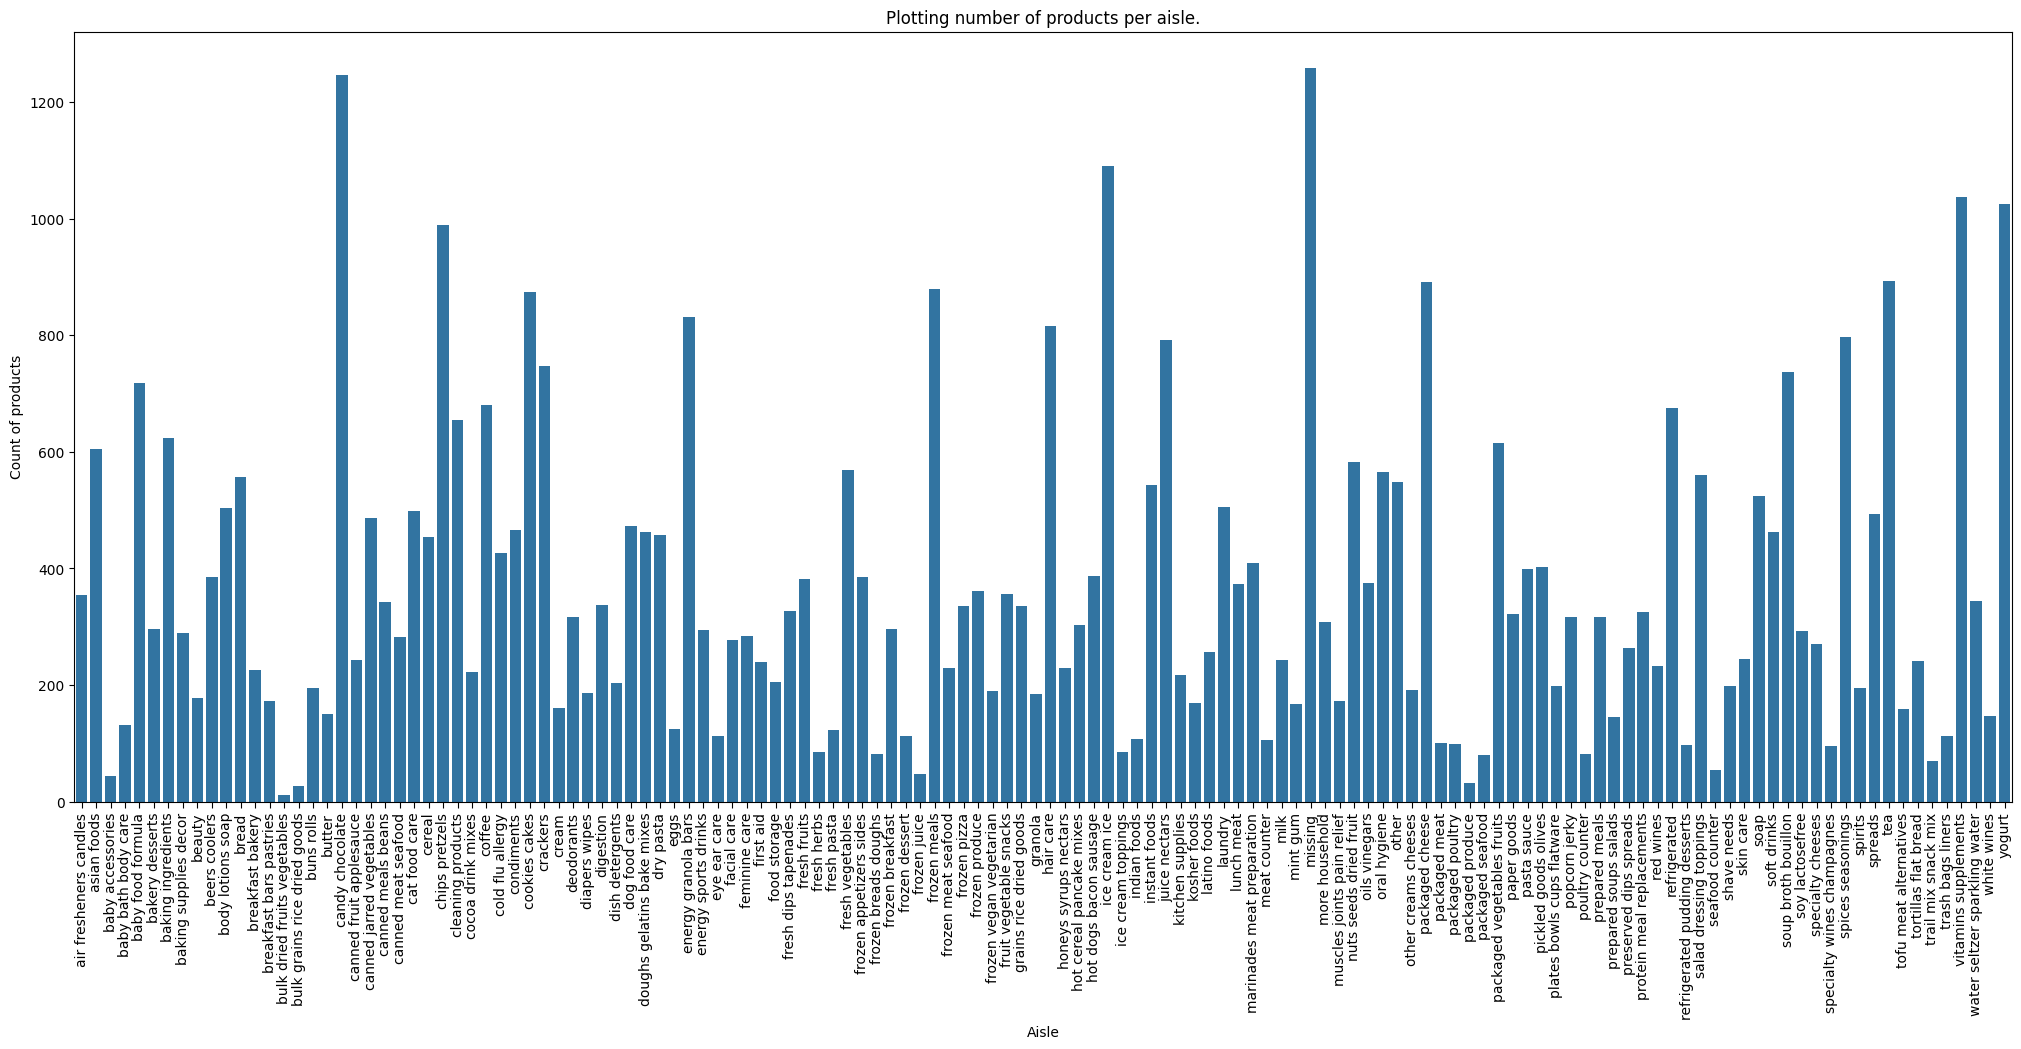

In [9]:
df = dpa_df.groupby('aisle')['product_id'].count().reset_index()
df.rename(columns = {'product_id':'Product_Count'},inplace=True)
print(df.head())

fig = plt.figure(figsize = (25,10))
ax = sns.barplot(x='aisle',y='Product_Count',data=df)
ax.xaxis.set_tick_params(rotation=90,size=4)
plt.xlabel('Aisle')
plt.ylabel('Count of products')
plt.title('Plotting number of products per aisle.')
plt.show()
fig.savefig('FIGURES\prodVsAisle.png')


There are some aisles that have very less product count. Similary some aisles have large product count. What are those aisles and their departments? 
What is the min, median and max product count? Get their aisle and dept info

In [10]:
print('Minimum product count is {0} and the aisle is {1}'.format(df['Product_Count'].min(),df['aisle'][df['Product_Count']== df['Product_Count'].min()].values))
print('Maximum product count is {0} and the aisle is {1}'.format(df['Product_Count'].max(),df['aisle'][df['Product_Count']== df['Product_Count'].max()].values))
print('Median number of products across all aisles: ',df["Product_Count"].median())

print('\nTop 5 aisles having least product count: \n',df.sort_values(by='Product_Count',ascending=True)[:5])
print('\nTop 5 aisles having highest product count: \n',df.sort_values(by='Product_Count',ascending=False)[:5])

Minimum product count is 12 and the aisle is ['bulk dried fruits vegetables']
Maximum product count is 1258 and the aisle is ['missing']
Median number of products across all aisles:  305.5

Top 5 aisles having least product count: 
                            aisle  Product_Count
14  bulk dried fruits vegetables             12
15  bulk grains rice dried goods             26
96              packaged produce             32
2               baby accessories             44
58                  frozen juice             47

Top 5 aisles having highest product count: 
                     aisle  Product_Count
85                missing           1258
18        candy chocolate           1246
71          ice cream ice           1091
130  vitamins supplements           1038
133                yogurt           1026


What are the departments these aisles belong to?

In [11]:
print('Department Name for aisle "missing" is : {0}.'.format(dpa_df[dpa_df['aisle'] == 'missing']['department'].unique()))
print('Department Name for aisle "bulk dried fruits vegetables" is : {0}.'.format(dpa_df[dpa_df['aisle'] == 'bulk dried fruits vegetables']['department'].unique()))
print('Aisles aunder department "bulk" are : {0}.'.format(dpa_df[dpa_df['department'] == 'bulk']['aisle'].unique()))

Department Name for aisle "missing" is : ['missing'].
Department Name for aisle "bulk dried fruits vegetables" is : ['bulk'].
Aisles aunder department "bulk" are : ['bulk grains rice dried goods' 'bulk dried fruits vegetables'].


  department  Product_Count
0    alcohol           1054
1     babies           1081
2     bakery           1516
3  beverages           4365
4  breakfast           1115


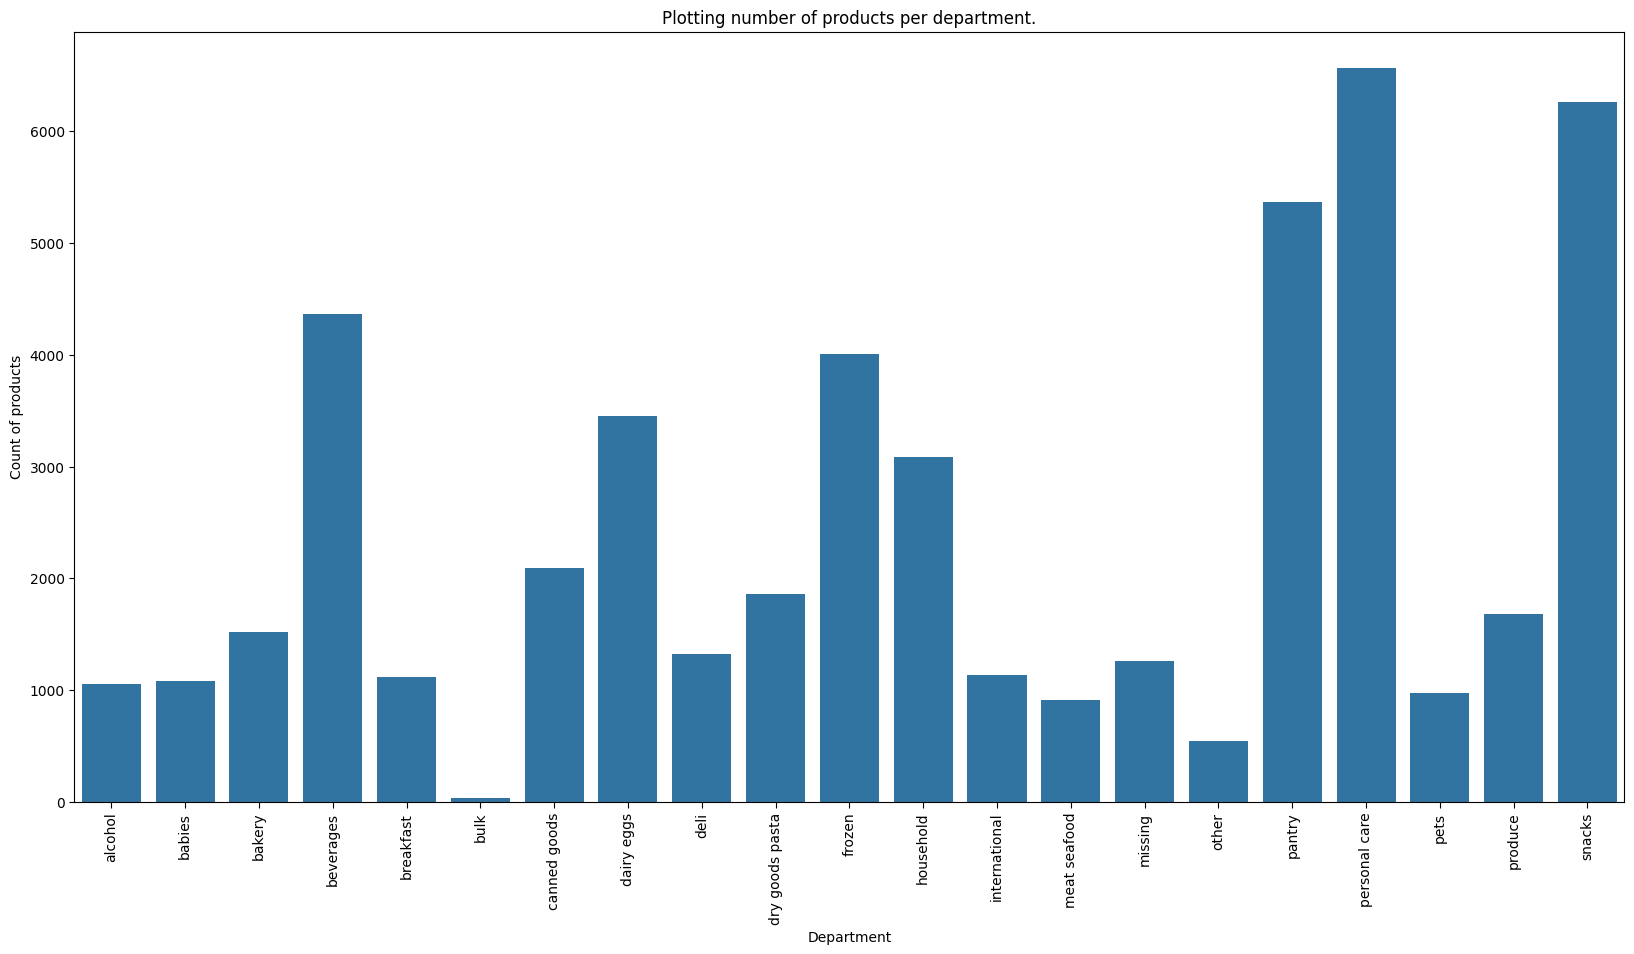

In [12]:
d_df = dpa_df.groupby('department')['product_id'].count().reset_index()
d_df.rename(columns = {'product_id':'Product_Count'},inplace=True)
print(d_df.head())

fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x='department',y='Product_Count', data=d_df)
ax.xaxis.set_tick_params(rotation=90,size=4)
plt.xlabel('Department')
plt.ylabel('Count of products')
plt.title('Plotting number of products per department.')
plt.show()
fig.savefig('FIGURES\prodVsDept.png')

In [13]:
print('Minimum product count is {0} and the department is "{1}".'.format(d_df['Product_Count'].min(), d_df['department'][d_df['Product_Count'] == d_df['Product_Count'].min()].values[0]))
print('Maximum product count is {0} and the department is "{1}".'.format(d_df['Product_Count'].max(), d_df['department'][d_df['Product_Count'] == d_df['Product_Count'].max()].values[0]))
print('Median product count across all departments is {0}.\n'.format(d_df['Product_Count'].median()))

print('Top 5 departments having least product count: \n',d_df.sort_values(by='Product_Count',ascending=True)[:5])
print('\nTop 5 departments having highest product count: \n',d_df.sort_values(by='Product_Count',ascending=False)[:5])

Minimum product count is 38 and the department is "bulk".
Maximum product count is 6563 and the department is "personal care".
Median product count across all departments is 1516.0.

Top 5 departments having least product count: 
       department  Product_Count
5           bulk             38
15         other            548
13  meat seafood            907
18          pets            972
0        alcohol           1054

Top 5 departments having highest product count: 
        department  Product_Count
17  personal care           6563
20         snacks           6264
16         pantry           5371
3       beverages           4365
10         frozen           4007


  department  Aisle_Count
0    alcohol            5
1     babies            4
2     bakery            5
3  beverages            8
4  breakfast            4


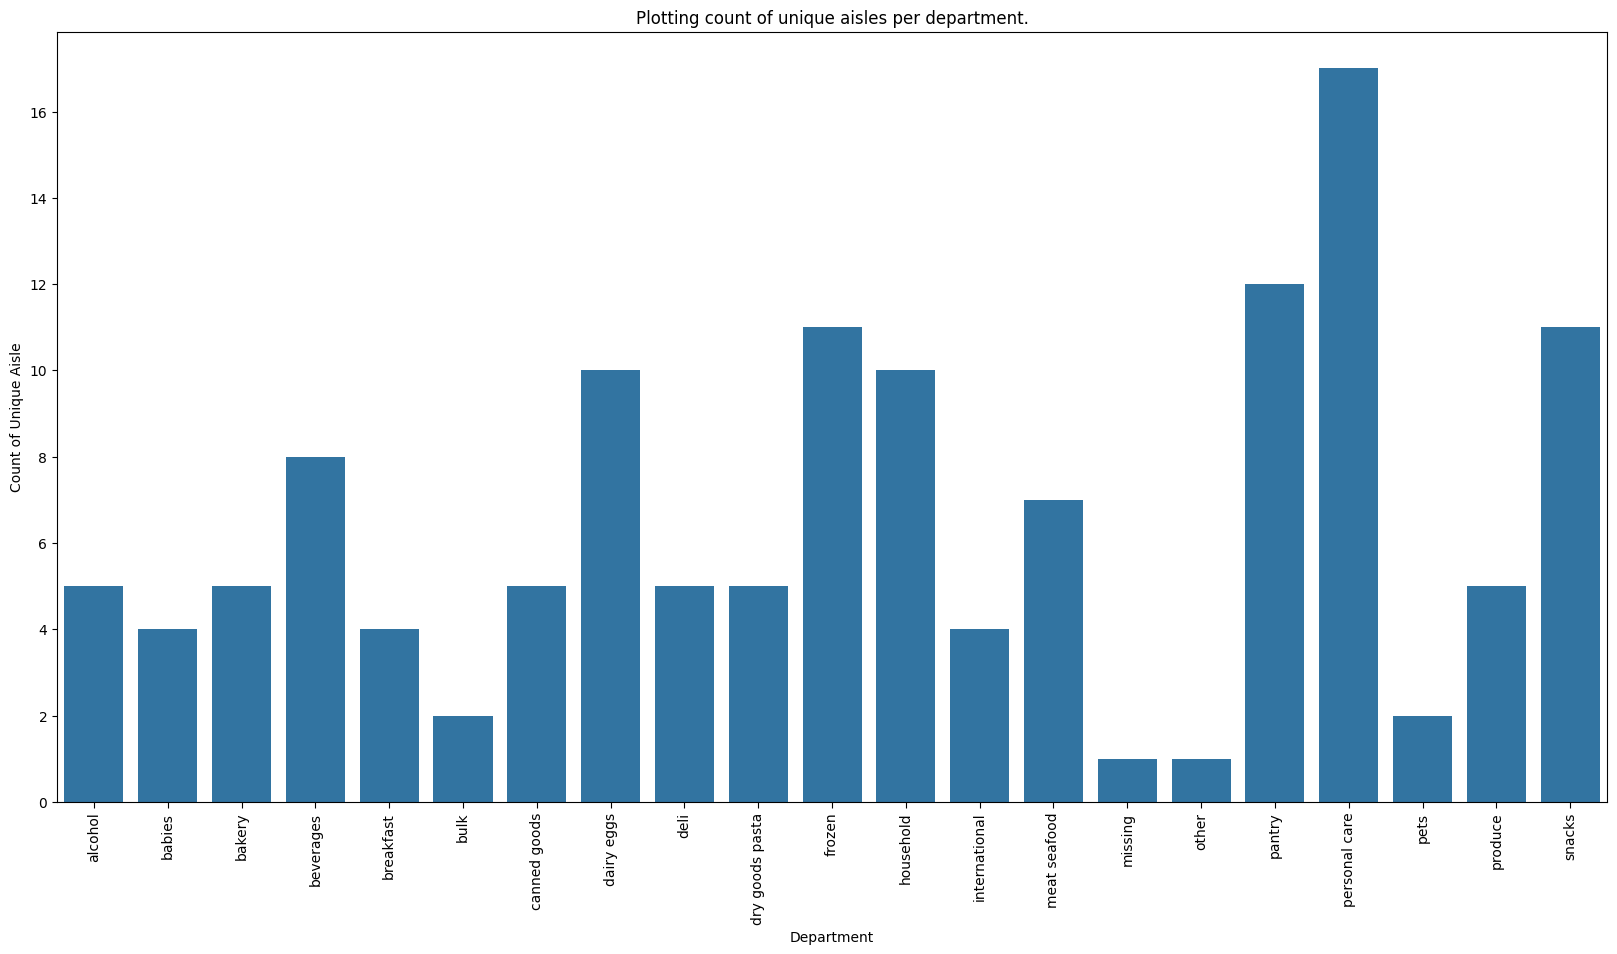

In [14]:
da_df = dpa_df.groupby('department')['aisle_id'].nunique().reset_index()
da_df.rename(columns={'aisle_id':'Aisle_Count'},inplace=True)
print(da_df.head())

fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x='department', y='Aisle_Count', data = da_df)
ax.xaxis.set_tick_params(rotation=90,size=4)
plt.xlabel('Department')
plt.ylabel('Count of Unique Aisle')
plt.title('Plotting count of unique aisles per department.')
fig.savefig('FIGURES\DeptVsAisle.png')

In [15]:
print('Minimum unique aisle count is {0} for  the department(s) is/are {1}.'.format(da_df['Aisle_Count'].min(), da_df['department'][da_df['Aisle_Count'] == da_df['Aisle_Count'].min()].values))
print('Maximum unique aisle count is {0} for the department(s) is/are {1}.'.format(da_df['Aisle_Count'].max(), da_df['department'][da_df['Aisle_Count'] == da_df['Aisle_Count'].max()].values))
print('Median unique aisle count across all departments is {0}.\n'.format(da_df['Aisle_Count'].median()))
print('Top 5 departments having least count of unique aisles: \n',da_df.sort_values(by='Aisle_Count',ascending=True)[:5])
print('\nTop 5 departments having highest count of unique aisles: \n',da_df.sort_values(by='Aisle_Count',ascending=False)[:5])

Minimum unique aisle count is 1 for  the department(s) is/are ['missing' 'other'].
Maximum unique aisle count is 17 for the department(s) is/are ['personal care'].
Median unique aisle count across all departments is 5.0.

Top 5 departments having least count of unique aisles: 
    department  Aisle_Count
14    missing            1
15      other            1
18       pets            2
5        bulk            2
1      babies            4

Top 5 departments having highest count of unique aisles: 
        department  Aisle_Count
17  personal care           17
16         pantry           12
10         frozen           11
20         snacks           11
7      dairy eggs           10


In [16]:
print(dpa_df[dpa_df['department'] == 'personal care']['department_id'].unique())
print('----')
print(dpa_df[(dpa_df['department'] == 'missing') | (dpa_df['department'] == 'other')]['department_id'].unique())
print(d_df[(d_df['department'] == 'missing') | (d_df['department'] == 'other')]['Product_Count'].unique())
print('---------')
print(dpa_df[(dpa_df['department'] == 'pets') | (dpa_df['department'] == 'bulk')]['department_id'].unique())
print(d_df[(d_df['department'] == 'pets') | (d_df['department'] == 'bulk')]['Product_Count'].unique())

[11]
----
[21  2]
[1258  548]
---------
[ 8 10]
[ 38 972]


1. Department 11 or Personal Care has the maximum product count as well as maximum unique aisle. This shows that department 11 is containing a large number of varied products. We can expect to see that many transactions are recorded having products belonging to department 11. We donot have enough understanding (yet) to state whether department 11 also has a re-order rate.


2. Department 21 and 2 or 'Missing' and 'Other' have products covering one unique aisles only. This means only one types of product are covering this department. But it still has considerable amount of product in that one aisle with 'Missing' Department having 1258 products and 'Other" having 548 products.


3. Department 10 or 'Bulk' records having minimum product count of 38 and is spread over 2 aisles that is 'bulk grains rice dried goods' aisle and 'bulk dried fruits vegetables' aisle. This shows that department 10 houses a small count of products of only 2 type. We need to check if this department also records low order or re-order rate, which will confirm the assumption that department 10 is a less important one.


3. Department 8 or 'Pets' also is spread over 2 aisles but have a considerable product count at 972.  We need to check if this department also records high order or re-order rate due to the density of products present, which will confirm the assumption that department 8 is a important one.



4. The median spread of a department is covering approx 5 unique aisles. Each aisles, in turn, contain an approx 306 products. This is in line with the insights that we have gathered from EDA (till now) that each department contains approximately 1516 products.

#### Understanding the "ORDERS" Dataset:

In [38]:
print('Shape: ', order_df.shape)
print('Head:')
order_df.head()


Shape:  (3421083, 7)
Head:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [27]:
print('\n Info: \n')
order_df.info()


 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [78]:
#How many unique users:
print('Number of Unique Users: ', order_df['user_id'].nunique())
print(" {0}% of total users are unique. \n".format(round((order_df['user_id'].nunique()/order_df['order_id'].count())*100,3)))
print('Distribution of orders across train,eval and test sets: ', order_df['eval_set'].value_counts())
print('\n Number of unique users for prior set orders: ',order_df[order_df['eval_set']=='prior']['user_id'].nunique())
print('\n Number of unique users for train set orders: ',order_df[order_df['eval_set']=='train']['user_id'].nunique())
print('% of total users: ', (order_df[order_df['eval_set']=='train']['user_id'].nunique())/(order_df['user_id'].nunique()) *100)
print('\n Number of unique users for test set orders: ',order_df[order_df['eval_set']=='test']['user_id'].nunique())
print('% of total users: ', (order_df[order_df['eval_set']=='test']['user_id'].nunique())/(order_df['user_id'].nunique()) *100)

Number of Unique Users:  206209
 6.028% of total users are unique. 

Distribution of orders across train,eval and test sets:  eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

 Number of unique users for prior set orders:  206209

 Number of unique users for train set orders:  131209
% of total users:  63.62913354897216

 Number of unique users for test set orders:  75000
% of total users:  36.37086645102784


- We have order data for 206209 unique users. 
- For all users we have their history of prior orders. 
- Out of total users, we have current order data for 131209 (63.63%) users. These orders are present in the 'train' dataset.
- Order data for the remaining 75000 (36.37%) users is present in the 'test' dataset for which we need predict the re-ordered products.

In [74]:
#Missing values:
print('Checking for nulls:\n',order_df.isna().sum())
order_df[order_df['days_since_prior_order'].isna()]

Checking for nulls:
 order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [75]:
order_df[order_df['days_since_prior_order'].isna()]['order_number'].value_counts()

order_number
1    206209
Name: count, dtype: int64

- Only 'days_since_prior_order' column has null values. These null are corresponding to the first order placed by the users. We can impute the nulls here by 0.

In [81]:
#Imputation of null:
order_df.fillna(0,inplace=True)
order_df.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
#Check the histogram to understand order frequency: